# Homework 3
#### Collin Butterfield    

## Problem 1

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt

## Delta 

In [2]:
def bsmCallDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(d1)
    
    return delta

def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(-d1)
    
    return delta

## Gamma

In [3]:
def bsmCallGamma(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    gamma = (np.exp(-div * tau) * norm.pdf(d1)) / (spot * sigma * np.sqrt(tau))
    
    return gamma

def bsmPutGamma(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    gamma = (np.exp(-div * tau) * norm.pdf(d1)) / (spot * sigma * np.sqrt(tau))
    
    return gamma

## Theta

In [4]:
def bsmCallTheta(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - (sigma * np.sqrt(tau))
    theta = (div * spot**(-div * tau) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2)) - ((strike * np.exp(-rate * tau) * norm.pdf(d2) * sigma) / (2 * np.sqrt(tau)))
    
    return theta
    
def bsmPutTheta(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - (sigma * np.sqrt(tau))
    calltheta = div * spot**(-div * tau) * norm.cdf(d1) - rate * strike * np.exp(-rate * tau) * norm.cdf(d2) - ((strike * np.exp(-rate * tau) * norm.pdf(d2) * sigma) / (2 * np.sqrt(tau)))
    theta = calltheta + rate * strike * np.exp(-rate * tau) - div * spot * np.exp(-div * tau)
    
    return theta

## Vega

In [5]:
def bsmCallVega(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    vega = spot * np.exp(-div * tau) * norm.pdf(d1) * np.sqrt(tau)
    
    return vega

def bsmPutVega(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    vega = spot * np.exp(-div * tau) * norm.pdf(d1) * np.sqrt(tau)
    
    return vega  

## Rho

In [6]:
def bsmCallRho(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - (sigma * np.sqrt(tau))
    rho = tau * strike * np.exp(-rate * tau) * norm.cdf(d2)
    
    return rho

def bsmPutRho(spot, strike, sigma, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * sigma * sigma) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - (sigma * np.sqrt(tau))
    rho = -tau * strike * np.exp(-rate * tau) * norm.cdf(-d2) 
    
    return rho

In [7]:
strike = 40.0
sigma = 0.30 # volitility
rate = 0.08
tau = 1
div = 0.0

dollarCap = 80# enter the dollar amount you would like to cap the spot price at i.e. 80

# array for Calls
dc = np.zeros(dollarCap)
gc = np.zeros(dollarCap)
tc = np.zeros(dollarCap)
vc = np.zeros(dollarCap)
rc = np.zeros(dollarCap)

# array for Puts
dp = np.zeros(dollarCap)
gp = np.zeros(dollarCap)
tp = np.zeros(dollarCap)
vp = np.zeros(dollarCap)
rp = np.zeros(dollarCap)

for i in range(dollarCap): # An error will occur for the first value of 0, but it is okay
    dc[i] = bsmCallDelta(i, strike, sigma, rate, tau, div)
    gc[i] = bsmCallGamma(i, strike, sigma, rate, tau, div)
    tc[i] = bsmCallTheta(i, strike, sigma, rate, tau, div)
    vc[i] = bsmCallVega(i, strike, sigma, rate, tau, div)
    rc[i] = bsmCallRho(i, strike, sigma, rate, tau, div)
    
    dp[i] = bsmPutDelta(i, strike, sigma, rate, tau, div)
    gp[i] = bsmPutGamma(i, strike, sigma, rate, tau, div)
    tp[i] = bsmPutTheta(i, strike, sigma, rate, tau, div)
    vp[i] = bsmPutVega(i, strike, sigma, rate, tau, div)
    rp[i] = bsmPutRho(i, strike, sigma, rate, tau, div)   
    

C:\Users\cdbut\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\cdbut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cdbut\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\cdbut\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\cdbut\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


### Delta Results

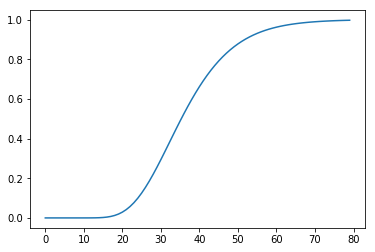

array([0.00000000e+00, 7.55459513e-33, 5.39162063e-22, 1.03845077e-16,
       1.95534056e-13, 3.63920406e-11, 1.74126478e-09, 3.46009440e-08,
       3.74656278e-07, 2.61285369e-06, 1.30937281e-05, 5.08261128e-05,
       1.61216695e-04, 4.34593443e-04, 1.02551991e-03, 2.16703857e-03,
       4.17430987e-03, 7.43450869e-03, 1.23832429e-02, 1.94708890e-02,
       2.91241918e-02, 4.17089363e-02, 5.74986910e-02, 7.66530110e-02,
       9.92066273e-02, 1.25069444e-01, 1.54035885e-01, 1.85801349e-01,
       2.19983242e-01, 2.56144151e-01, 2.93815028e-01, 3.32516769e-01,
       3.71779044e-01, 4.11155745e-01, 4.50236799e-01, 4.88656418e-01,
       5.26098093e-01, 5.62296739e-01, 5.97038513e-01, 6.30158805e-01,
       6.61538880e-01, 6.91101634e-01, 7.18806802e-01, 7.44645959e-01,
       7.68637534e-01, 7.90822022e-01, 8.11257519e-01, 8.30015665e-01,
       8.47178034e-01, 8.62832986e-01, 8.77072980e-01, 8.89992317e-01,
       9.01685296e-01, 9.12244728e-01, 9.21760774e-01, 9.30320077e-01,
      

In [8]:
# Call results
plt.plot(dc)
plt.show()
dc

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999997, 0.99999963, 0.99999739,
       0.99998691, 0.99994917, 0.99983878, 0.99956541, 0.99897448,
       0.99783296, 0.99582569, 0.99256549, 0.98761676, 0.98052911,
       0.97087581, 0.95829106, 0.94250131, 0.92334699, 0.90079337,
       0.87493056, 0.84596411, 0.81419865, 0.78001676, 0.74385585,
       0.70618497, 0.66748323, 0.62822096, 0.58884425, 0.5497632 ,
       0.51134358, 0.47390191, 0.43770326, 0.40296149, 0.3698412 ,
       0.33846112, 0.30889837, 0.2811932 , 0.25535404, 0.23136247,
       0.20917798, 0.18874248, 0.16998434, 0.15282197, 0.13716701,
       0.12292702, 0.11000768, 0.0983147 , 0.08775527, 0.07823923,
       0.06967992, 0.06199488, 0.05510618, 0.04894077, 0.04343053,
       0.03851231, 0.03412787, 0.03022367, 0.02675075, 0.02366443,
       0.02092413, 0.01849304, 0.01633792, 0.01442876, 0.01273857,
       0.01124312, 0.00992067, 0.00875179, 0.00771909, 0.00680

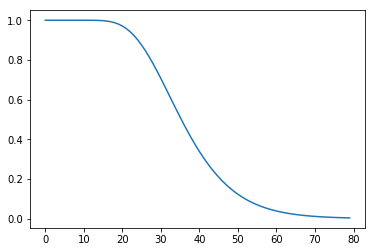

In [9]:
# Put results
plt.plot(dp)
plt.show
dp

### Gamma Results

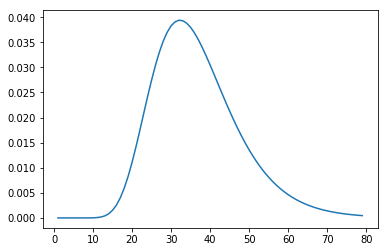

array([           nan, 3.01242587e-31, 8.69079239e-21, 9.61822901e-16,
       1.20442325e-12, 1.61624295e-10, 5.86981217e-09, 9.17364286e-08,
       8.01817685e-07, 4.60414080e-06, 1.92946793e-05, 6.34191335e-05,
       1.72079859e-04, 4.00182772e-04, 8.20442038e-04, 1.51529119e-03,
       2.56418219e-03, 4.02939118e-03, 5.94379429e-03, 8.30325646e-03,
       1.10648424e-02, 1.41506083e-02, 1.74556733e-02, 2.08587516e-02,
       2.42333038e-02, 2.74577872e-02, 3.04239716e-02, 3.30427981e-02,
       3.52476956e-02, 3.69955858e-02, 3.82660031e-02, 3.90588324e-02,
       3.93911695e-02, 3.92937502e-02, 3.88073102e-02, 3.79791426e-02,
       3.68600306e-02, 3.55016553e-02, 3.39545153e-02, 3.22663505e-02,
       3.04810305e-02, 2.86378500e-02, 2.67711648e-02, 2.49103011e-02,
       2.30796730e-02, 2.12990528e-02, 1.95839411e-02, 1.79459994e-02,
       1.63935103e-02, 1.49318413e-02, 1.35638934e-02, 1.22905222e-02,
       1.11109239e-02, 1.00229803e-02, 9.02356340e-03, 8.10879791e-03,
      

In [10]:
# Call results
plt.plot(gc)
plt.show()
gc

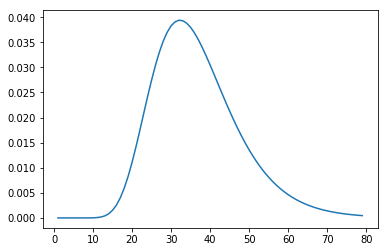

array([           nan, 3.01242587e-31, 8.69079239e-21, 9.61822901e-16,
       1.20442325e-12, 1.61624295e-10, 5.86981217e-09, 9.17364286e-08,
       8.01817685e-07, 4.60414080e-06, 1.92946793e-05, 6.34191335e-05,
       1.72079859e-04, 4.00182772e-04, 8.20442038e-04, 1.51529119e-03,
       2.56418219e-03, 4.02939118e-03, 5.94379429e-03, 8.30325646e-03,
       1.10648424e-02, 1.41506083e-02, 1.74556733e-02, 2.08587516e-02,
       2.42333038e-02, 2.74577872e-02, 3.04239716e-02, 3.30427981e-02,
       3.52476956e-02, 3.69955858e-02, 3.82660031e-02, 3.90588324e-02,
       3.93911695e-02, 3.92937502e-02, 3.88073102e-02, 3.79791426e-02,
       3.68600306e-02, 3.55016553e-02, 3.39545153e-02, 3.22663505e-02,
       3.04810305e-02, 2.86378500e-02, 2.67711648e-02, 2.49103011e-02,
       2.30796730e-02, 2.12990528e-02, 1.95839411e-02, 1.79459994e-02,
       1.63935103e-02, 1.49318413e-02, 1.35638934e-02, 1.22905222e-02,
       1.11109239e-02, 1.00229803e-02, 9.02356340e-03, 8.10879791e-03,
      

In [11]:
# Put results
plt.plot(gp)
plt.show()
gp

### Theta Results 

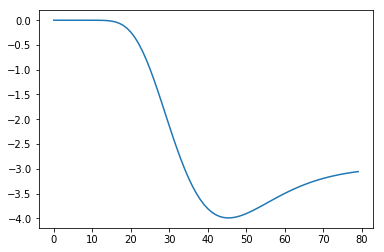

array([ 0.00000000e+00, -1.41455942e-32, -1.64803827e-21, -4.13606333e-16,
       -9.27353839e-13, -1.95768844e-10, -1.03064130e-08, -2.20690571e-07,
       -2.53617959e-06, -1.85555622e-05, -9.66609414e-05, -3.87137576e-04,
       -1.25917550e-03, -3.46237725e-03, -8.29627904e-03, -1.77310885e-02,
       -3.44241460e-02, -6.16002263e-02, -1.02799506e-01, -1.61530837e-01,
       -2.40889170e-01, -3.43200393e-01, -4.69746561e-01, -6.20605056e-01,
       -7.94613018e-01, -9.89448678e-01, -1.20180695e+00, -1.42763898e+00,
       -1.66242356e+00, -1.90144133e+00, -2.14002825e+00, -2.37379186e+00,
       -2.59878089e+00, -2.81160480e+00, -3.00950482e+00, -3.19038140e+00,
       -3.35278504e+00, -3.49587851e+00, -3.61937845e+00, -3.72348364e+00,
       -3.80879661e+00, -3.87624361e+00, -3.92699722e+00, -3.96240448e+00,
       -3.98392247e+00, -3.99306245e+00, -3.99134290e+00, -3.98025148e+00,
       -3.96121522e+00, -3.93557833e+00, -3.90458680e+00, -3.86937860e+00,
       -3.83097885e+00, -

In [12]:
# Call results
plt.plot(tc)
plt.show()
tc

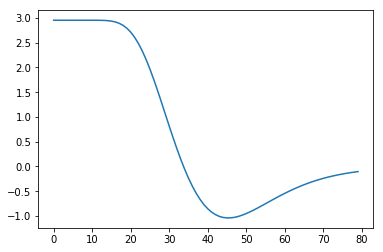

array([ 2.95397231,  2.95397231,  2.95397231,  2.95397231,  2.95397231,
        2.95397231,  2.9539723 ,  2.95397209,  2.95396977,  2.95395375,
        2.95387565,  2.95358517,  2.95271313,  2.95050993,  2.94567603,
        2.93624122,  2.91954816,  2.89237208,  2.8511728 ,  2.79244147,
        2.71308314,  2.61077192,  2.48422575,  2.33336725,  2.15935929,
        1.96452363,  1.75216536,  1.52633333,  1.29154875,  1.05253098,
        0.81394406,  0.58018045,  0.35519142,  0.14236751, -0.05553251,
       -0.23640909, -0.39881273, -0.54190621, -0.66540614, -0.76951133,
       -0.85482431, -0.9222713 , -0.97302491, -1.00843217, -1.02995016,
       -1.03909014, -1.03737059, -1.02627917, -1.00724291, -0.98160603,
       -0.95061449, -0.91540629, -0.87700655, -0.83632651, -0.79416569,
       -0.75121628, -0.70806928, -0.66522179, -0.62308497, -0.58199233,
       -0.54220806, -0.50393514, -0.46732313, -0.43247549, -0.39945629,
       -0.36829647, -0.33899934, -0.3115456 , -0.28589773, -0.26

In [13]:
# Put results
plt.plot(tp)
plt.show()
tp

### Vega Results

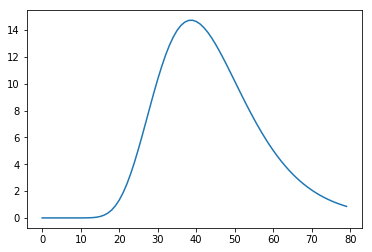

array([0.00000000e+00, 9.03727760e-32, 1.04289509e-20, 2.59692183e-15,
       5.78123159e-12, 1.21218221e-09, 6.33939714e-08, 1.34852550e-06,
       1.53948995e-05, 1.11880621e-04, 5.78840378e-04, 2.30211455e-03,
       7.43384991e-03, 2.02892665e-02, 4.82419919e-02, 1.02282155e-01,
       1.96929192e-01, 3.49348215e-01, 5.77736805e-01, 8.99242674e-01,
       1.32778108e+00, 1.87212547e+00, 2.53456376e+00, 3.31028387e+00,
       4.18751489e+00, 5.14833509e+00, 6.16998143e+00, 7.22645995e+00,
       8.29025800e+00, 9.33398629e+00, 1.03318208e+01, 1.12606614e+01,
       1.21009673e+01, 1.28372682e+01, 1.34583752e+01, 1.39573349e+01,
       1.43311799e+01, 1.45805298e+01, 1.47090960e+01, 1.47231357e+01,
       1.46308947e+01, 1.44420678e+01, 1.41673004e+01, 1.38177440e+01,
       1.34046741e+01, 1.29391746e+01, 1.24318858e+01, 1.18928138e+01,
       1.13311943e+01, 1.07554053e+01, 1.01729200e+01, 9.59029450e+00,
       9.01318145e+00, 8.44636549e+00, 7.89381326e+00, 7.35873410e+00,
      

In [14]:
# Call results
plt.plot(vc)
plt.show()
vc

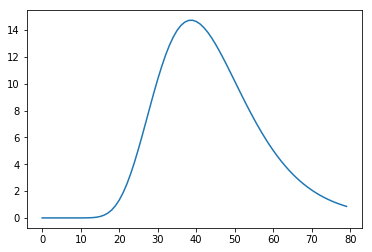

array([0.00000000e+00, 9.03727760e-32, 1.04289509e-20, 2.59692183e-15,
       5.78123159e-12, 1.21218221e-09, 6.33939714e-08, 1.34852550e-06,
       1.53948995e-05, 1.11880621e-04, 5.78840378e-04, 2.30211455e-03,
       7.43384991e-03, 2.02892665e-02, 4.82419919e-02, 1.02282155e-01,
       1.96929192e-01, 3.49348215e-01, 5.77736805e-01, 8.99242674e-01,
       1.32778108e+00, 1.87212547e+00, 2.53456376e+00, 3.31028387e+00,
       4.18751489e+00, 5.14833509e+00, 6.16998143e+00, 7.22645995e+00,
       8.29025800e+00, 9.33398629e+00, 1.03318208e+01, 1.12606614e+01,
       1.21009673e+01, 1.28372682e+01, 1.34583752e+01, 1.39573349e+01,
       1.43311799e+01, 1.45805298e+01, 1.47090960e+01, 1.47231357e+01,
       1.46308947e+01, 1.44420678e+01, 1.41673004e+01, 1.38177440e+01,
       1.34046741e+01, 1.29391746e+01, 1.24318858e+01, 1.18928138e+01,
       1.13311943e+01, 1.07554053e+01, 1.01729200e+01, 9.59029450e+00,
       9.01318145e+00, 8.44636549e+00, 7.89381326e+00, 7.35873410e+00,
      

In [15]:
# Put results
plt.plot(vp)
plt.show()
vp

### Rho Results

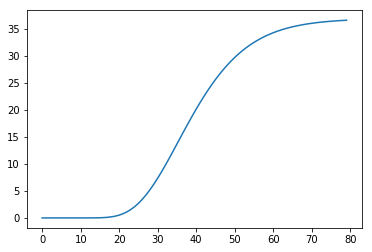

array([0.00000000e+00, 7.37097249e-33, 1.04619556e-21, 3.00850726e-16,
       7.52113760e-13, 1.74268896e-10, 9.96646619e-09, 2.30146819e-07,
       2.83680825e-06, 2.21683627e-05, 1.22936058e-04, 5.22754930e-04,
       1.80122516e-03, 5.23734084e-03, 1.32497533e-02, 2.98595655e-02,
       6.10595899e-02, 1.14974924e-01, 2.01737311e-01, 3.33055447e-01,
       5.21525092e-01, 7.79769650e-01, 1.11952497e+00, 1.55078094e+00,
       2.08107230e+00, 2.71498018e+00, 3.45387173e+00, 4.29587483e+00,
       5.23606070e+00, 6.26679229e+00, 7.37818905e+00, 8.55865819e+00,
       9.79544750e+00, 1.10751821e+01, 1.23843568e+01, 1.37097646e+01,
       1.50388507e+01, 1.63599880e+01, 1.76626756e+01, 1.89376660e+01,
       2.01770302e+01, 2.13741681e+01, 2.25237769e+01, 2.36217860e+01,
       2.46652670e+01, 2.56523283e+01, 2.65820004e+01, 2.74541177e+01,
       2.82692009e+01, 2.90283442e+01, 2.97331099e+01, 3.03854303e+01,
       3.09875205e+01, 3.15417999e+01, 3.20508252e+01, 3.25172310e+01,
      

In [16]:
# Call results
plt.plot(rc)
plt.show()
rc

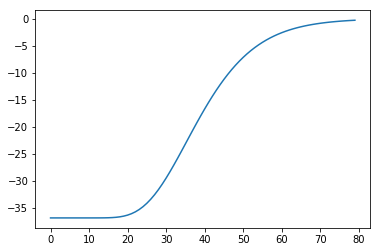

array([-36.92465386, -36.92465386, -36.92465386, -36.92465386,
       -36.92465386, -36.92465386, -36.92465385, -36.92465363,
       -36.92465102, -36.92463169, -36.92453092, -36.9241311 ,
       -36.92285263, -36.91941651, -36.9114041 , -36.89479429,
       -36.86359427, -36.80967893, -36.72291654, -36.59159841,
       -36.40312876, -36.14488421, -35.80512889, -35.37387292,
       -34.84358156, -34.20967368, -33.47078212, -32.62877902,
       -31.68859316, -30.65786156, -29.54646481, -28.36599567,
       -27.12920636, -25.84947175, -24.54029706, -23.21488927,
       -21.88580315, -20.56466585, -19.2619783 , -17.98698782,
       -16.74762366, -15.55048578, -14.40087692, -13.30286784,
       -12.2593869 , -11.2723256 , -10.34265344,  -9.47053615,
        -8.655453  ,  -7.89630963,  -7.19154395,  -6.53922352,
        -5.93713339,  -5.38285391,  -4.8738287 ,  -4.4074229 ,
        -3.98097232,  -3.5918242 ,  -3.2373703 ,  -2.91507316,
        -2.62248641,  -2.35726974,  -2.11719952,  -1.90

In [17]:
# Put results
plt.plot(rp)
plt.show()
rp

## Problem 2

In [23]:
def PricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'r', linewidth = 3)
    plt.title("Simulated Daily Prices", color="red")
    plt.xlabel("Time Steps (days)", color="red")
    plt.ylabel("Stock Price ($)", color="red")
    plt.xlim((0, nsteps -1))
    plt.grid(True)
    plt.show()

Day 	 Spot Price
--- 	 -----
0 	 41.0
1 	 40.259763824803805
2 	 40.67954999756082
3 	 40.70831659780009
4 	 40.83375084302171
5 	 40.03142974601177


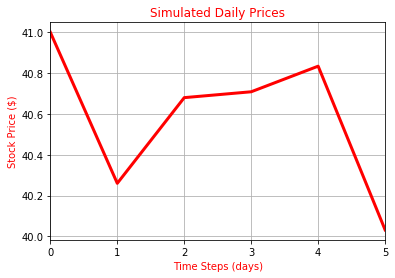

In [24]:
spot = 41.0
strike = 40.0
sigma = 0.30 # volitility
rate = 0.08
T = 1
div = 0.0
h = T / 252
n = 6 # the number of steps 

pt = np.zeros(n)
z = np.random.normal(size=n)
pt[0] = spot

print("Day", '\t', "Spot Price") #table column headings
print("---", '\t', "-----")
print("0", '\t', spot)
for i in range(1, n):
    pt[i] = pt[i-1] * np.exp((rate - div - 0.5 * sigma**2) * h + sigma * np.sqrt(h) * z[i])
    print(i, '\t', pt[i])
    
PricePath(pt) 